In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('loan_approval.csv')

In [3]:
df.shape

(150, 5)

In [4]:
df.columns

Index(['income', 'age', 'credit_score', 'loan_amount', 'loan_status'], dtype='object')

In [5]:
df.head()

,income,age,credit_score,loan_amount,loan_status
0,35795,47,622,45419,Rejected
1,20860,29,587,6167,Rejected
2,96820,57,454,32192,Rejected
3,74886,53,789,6062,Approved
4,26265,44,685,23540,Rejected


In [6]:
df.tail()

,income,age,credit_score,loan_amount,loan_status
145,26776,53,368,9158,Rejected
146,75016,23,398,25309,Rejected
147,29474,38,695,11970,Rejected
148,78053,45,324,11938,Rejected
149,41959,51,768,26168,Approved


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   income        150 non-null    int64 
 1   age           150 non-null    int64 
 2   credit_score  150 non-null    int64 
 3   loan_amount   150 non-null    int64 
 4   loan_status   150 non-null    object
dtypes: int64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,income,age,credit_score,loan_amount
count,150.000000,150.000000,150.000000,150.000000
mean,61000.833333,41.633333,568.393333,28624.560000
std,23946.075292,11.598089,161.547836,12564.605314
min,20206.000000,21.000000,304.000000,5009.000000
25%,41865.250000,31.250000,414.500000,18444.000000
50%,62081.500000,43.500000,569.500000,28959.500000
75%,83240.000000,52.000000,705.000000,39609.500000
max,99575.000000,59.000000,847.000000,49597.000000


In [9]:
df.dtypes

income           int64
age              int64
credit_score     int64
loan_amount      int64
loan_status     object
dtype: object

In [10]:
df.isnull().sum()

income          0
age             0
credit_score    0
loan_amount     0
loan_status     0
dtype: int64

In [11]:
df.isna().sum()

income          0
age             0
credit_score    0
loan_amount     0
loan_status     0
dtype: int64

In [12]:
df.duplicated().sum()

0

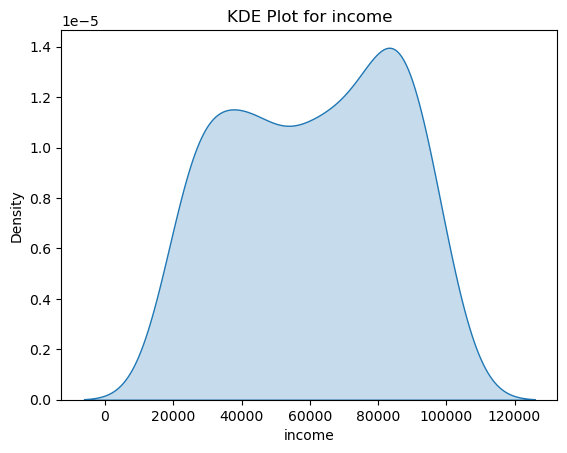

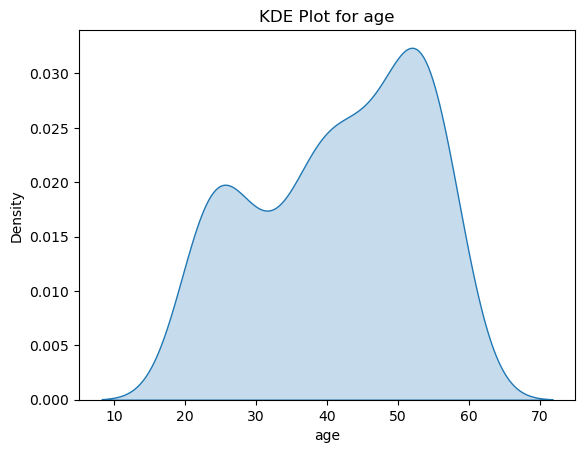

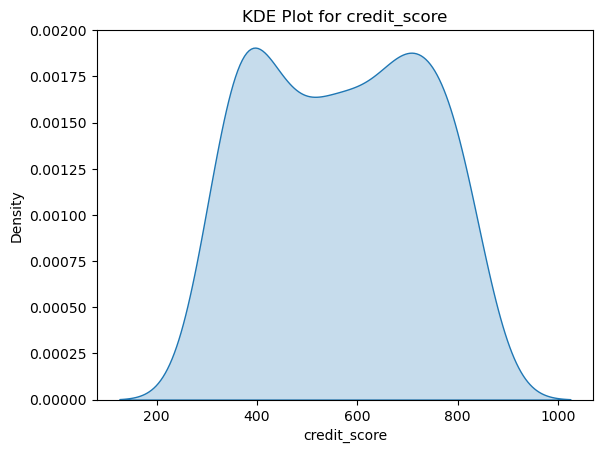

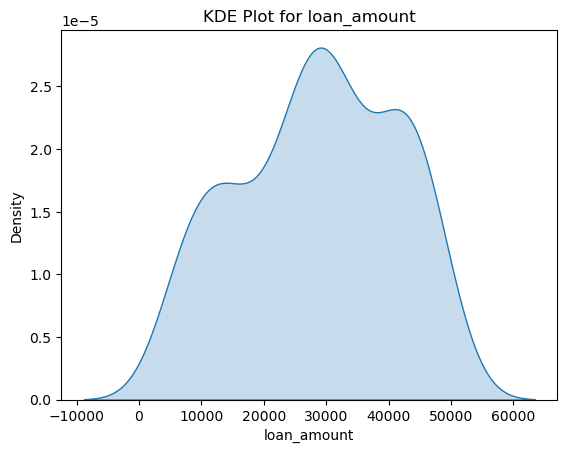

In [13]:
for i in df.columns:
    if df[i].dtype != 'object': 
       
        sns.kdeplot(df[i],fill=True)
        plt.title(f"KDE Plot for {i}")
        plt.show()

In [14]:
d=df.drop(columns='loan_status')
d.skew()

income         -0.113663
age            -0.331901
credit_score    0.012817
loan_amount    -0.186572
dtype: float64

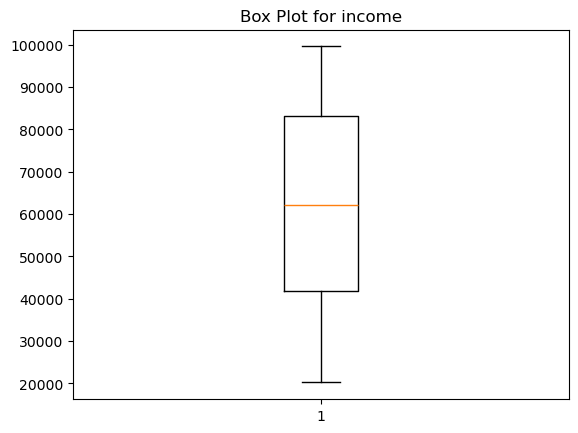

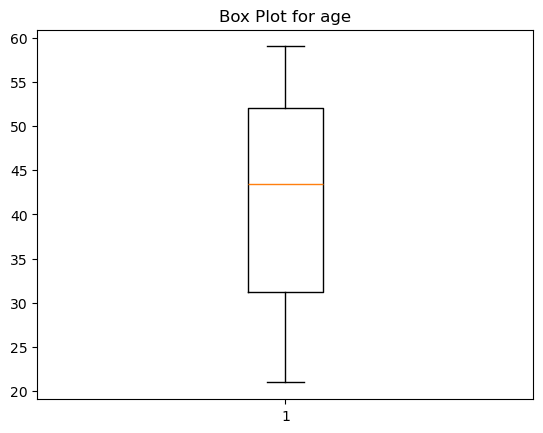

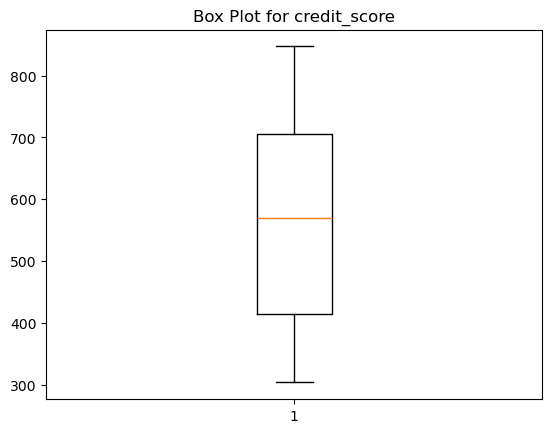

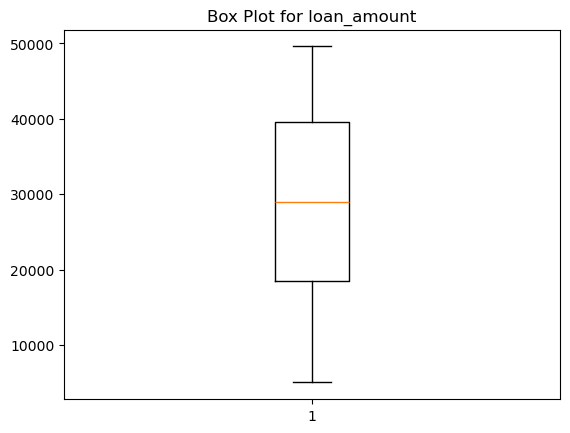

In [15]:
for i in df.columns:
    if df[i].dtype !='object':
        plt.boxplot(df[i])
        plt.title(f'Box Plot for {i}')
        plt.show()

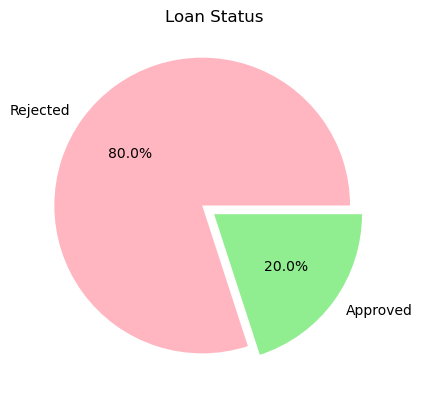

In [16]:
count=df['loan_status'].value_counts()
plt.Figure(figsize=(25,30))
plt.pie(count,labels=count.index,autopct="%1.1f%%",explode=[0.1,0],colors=['lightpink','lightgreen'])
plt.title('Loan Status')
plt.show()

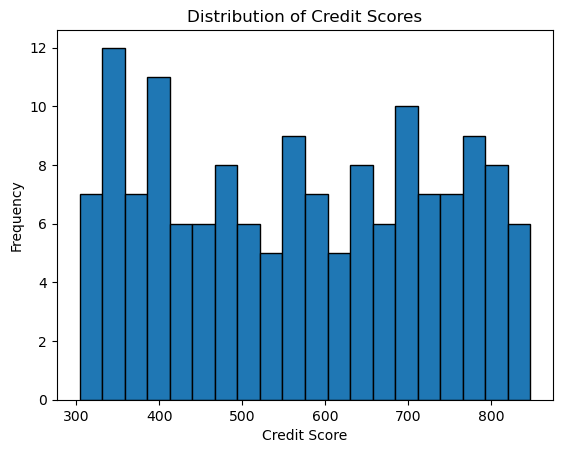

In [17]:
plt.hist(df['credit_score'], bins=20, edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Credit Score')
plt.title("Distribution of Credit Scores")
plt.show()

In [18]:
d=df.drop(columns='loan_status')
d.corr()

,income,age,credit_score,loan_amount
income,1.000000,-0.020720,0.040607,0.127030
age,-0.020720,1.000000,0.109715,0.004501
credit_score,0.040607,0.109715,1.000000,-0.149548
loan_amount,0.127030,0.004501,-0.149548,1.000000


<Axes: >

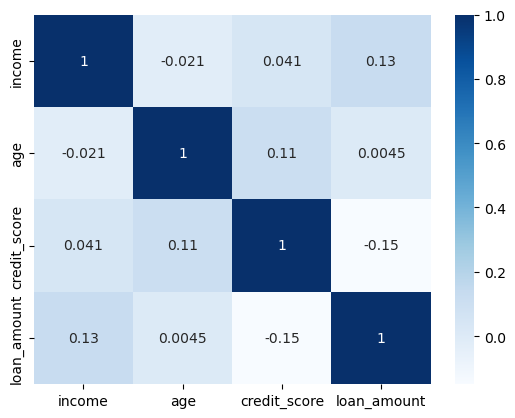

In [19]:
sns.heatmap(d.corr(),annot=True,cmap='Blues')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
X = df.drop(columns='loan_status')
y = df['loan_status']
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
new_applicant = pd.DataFrame([[55000, 35, 720, 20000]], 
                             columns=['income', 'age', 'credit_score', 'loan_amount'])

probability = model.predict_proba(new_applicant)

print("Probability of Rejection:", probability[0][0])
print("Probability of Approval:", probability[0][1])


Probability of Rejection: 0.87
Probability of Approval: 0.13


In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

y_pred = model.predict(X_test)


acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", acc)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.9777777777777777
F1 Score: 0.987012987012987
Precision: 0.9743589743589743
Recall: 1.0


In [27]:
import pickle
filename = 'trained_model.sav'

with open(filename, 'wb') as f:
    pickle.dump((model), f)
print("Model and scaler saved successfully!")

with open(filename, 'rb') as f:
    loaded_model = pickle.load(f)
print("Model and scaler loaded successfully!")

Model and scaler saved successfully!
Model and scaler loaded successfully!
